# TECHNIQUES DE VISUALISATION DE DONNEES

### I. EXERCICE 1

#### 1. Préparation des données

In [1]:
# Import des bibliothèques :
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [2]:
# Import du fichier CSV :
phd = pd.read_csv("dataset.csv", 
                  sep = ",",
                  encoding = "utf-8",
                  engine = "python",
                  decimal = ",")

In [3]:
# Affichage des premières lignes du dataset 'phd' :
phd.head(3)

,Unnamed: 0,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,...,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_prÃ©di,Genre,etablissement_rec,Langue_rec
0,0,Saeed Al marri,NaN,Le credit documentaire et l'onopposabilite des...,Philippe Delebecque,Delebecque Philippe,29561248,Paris 1,27361802,Driot prive,...,NaN,na,s69480,non,26-01-12,26-01-12,Droit et Science Politique,male,Université Paris 1 - Panthéon Sorbonne,NaN
1,1,Andrea Ramazzotti,174423705,Application de la PGD a la resolution de probl...,"Jean-Claude Grandidier,Marianne Beringhier","Grandidier Jean-Claude,Beringhier Marianne","715,441,511","Chasseneuil-du-Poitou, Ecole nationale superie...",28024400,"Mecanique des solides, des materiaux, des stru...",...,NaN,na,s98826,non,22-11-13,22-11-13,"Materiaux, Milieux et Chimie",female,École nationale supérieure de mécanique et d'a...,NaN
2,2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,...,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12,Medecine,male,Université de Lorraine,Français


In [4]:
# Affichage des noms des variables :
print(phd.columns)

Index(['Unnamed: 0', 'Auteur', 'Identifiant auteur', 'Titre',
       'Directeur de these', 'Directeur de these (nom prenom)',
       'Identifiant directeur', 'Etablissement de soutenance',
       'Identifiant etablissement', 'Discipline', 'Statut',
       'Date de premiere inscription en doctorat', 'Date de soutenance',
       'Year', 'Langue de la these', 'Identifiant de la these',
       'Accessible en ligne', 'Publication dans theses.fr',
       'Mise a jour dans theses.fr', 'Discipline_prÃ©di', 'Genre',
       'etablissement_rec', 'Langue_rec'],
      dtype='object')


In [5]:
# Changement des noms de colonnes :
phd.rename(columns = {'Discipline_prÃ©di': 'Discipline_prédi', 
                      'Year': 'Année'}, 
                      inplace = True)

In [6]:
# Affichage des valeurs uniques de la colonne 'Discipline_prédi" :
phd['Discipline_prédi'].unique()

array(['Droit et Science Politique', 'Materiaux, Milieux et Chimie',
       'Medecine', 'SHS', 'Biologie', 'Langues et Litteratures',
       'Psychologie', 'Economie Gestion', 'Informatique',
       "Science de l'ingÃ©nieur", 'Poubelle', "Sciences de l'education",
       'MathÃ©matiques', 'Science de la Terre',
       'Mathematiques et Informatique'], dtype=object)

In [7]:
# Suppression des lignes contenant la valeur 'poubelle' :
phd = phd[phd['Discipline_prédi'] != 'Poubelle']

In [8]:
# Décompte du nombre d'occurences de la donnée 'poubelle' dans la colonne 'Discipline_prédi' :
count_poubelle = phd['Discipline_prédi'].value_counts().get('Poubelle', 0)
count_poubelle

0

In [9]:
# Remplacement de l'intitulé des colonnes :
phd['Discipline_prédi'] = phd['Discipline_prédi'].replace({"Science de l'ingÃ©nieur": "Sciences de l'Ingénieur", 
                                                           "MathÃ©matiques": "Mathématiques",
                                                           "Medecine":"Médecine",
                                                           "Langues et Litteratures":"Langues et Littérature",
                                                           "Economie Gestion": "Economie et Gestion",
                                                           "Sciences de l'education":"Sciences de l'Education",
                                                           "SHS":"Sciences Humaines et Sociales",
                                                           "Science de la Terre":"Sciences de la Terre",
                                                           "Mathematiques et Informatique":"Mathématiques et Informatique",
                                                           "Materiaux, Milieux et Chimie":"Matériaux, Milieux et Chimie",
                                                           "Droit et Science Politique":"Droit et Sciences Politiques"})

In [10]:
# Affichage des valeurs uniques de la colonne 'Discipline_prédi" :
phd['Discipline_prédi'].unique()

array(['Droit et Sciences Politiques', 'Matériaux, Milieux et Chimie',
       'Médecine', 'Sciences Humaines et Sociales', 'Biologie',
       'Langues et Littérature', 'Psychologie', 'Economie et Gestion',
       'Informatique', "Sciences de l'Ingénieur",
       "Sciences de l'Education", 'Mathématiques', 'Sciences de la Terre',
       'Mathématiques et Informatique'], dtype=object)

In [11]:
# Conversion des valeurs non numériques en 'NaN' pour la colonne 'Year' :
phd['Année'] = pd.to_numeric(phd['Année'], errors = 'coerce')

In [12]:
# Suppression des lignes où 'Année' est 'NaN' :
phd = phd.dropna(subset = ['Année'])

In [13]:
# Conversion des données de la colonne 'Année' en entiers :
phd['Année'] = phd['Année'].astype(int)

In [14]:
# Création du dataframe contenant les colonnes 'Année' et 'Discipline_prédi' :
discipline = phd[['Année', 'Discipline_prédi']]

In [15]:
# Filtre des données pour ne garder que les années entre 1985 et 2018 :
discipline_85_18 = discipline[(discipline['Année'] >= 1985) & (discipline['Année'] <= 2018)]

In [16]:
# Affichage du dataframe :
discipline_85_18.head(3)

,Année,Discipline_prédi
2,1993,Médecine
5,2008,Droit et Sciences Politiques
6,2005,Droit et Sciences Politiques


In [17]:
# Comptabilisation des soutenances par année et par discipline :
discipline_85_18_groupé = discipline_85_18.groupby(['Année', 'Discipline_prédi']).size().unstack(fill_value=0)
discipline_85_18_groupé.head(3)

Discipline_prédi,Biologie,Droit et Sciences Politiques,Economie et Gestion,Informatique,Langues et Littérature,Mathématiques,Mathématiques et Informatique,"Matériaux, Milieux et Chimie",Médecine,Psychologie,Sciences Humaines et Sociales,Sciences de l'Education,Sciences de l'Ingénieur,Sciences de la Terre
Année,,,,,,,,,,,,,,
1985,695,168,220,45,268,120,2,331,434,94,380,5,136,109
1986,967,400,390,69,415,331,1,635,364,239,863,1,244,243
1987,1716,413,413,101,646,766,8,1359,225,726,1069,3,367,626


#### 2. Stacked area plot

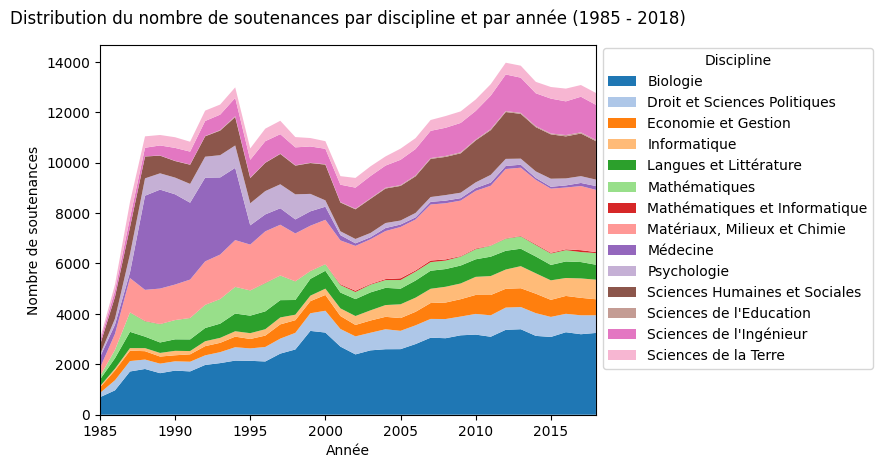

In [18]:
# Génération des couleurs à partir de la palette 'tab20' :
colors = plt.cm.tab20.colors

# Création du graphique :
plt.stackplot(discipline_85_18_groupé.index, 
              discipline_85_18_groupé.T, 
              labels = discipline_85_18_groupé.columns, 
              colors = colors[:len(discipline_85_18_groupé.columns)])

# Affichage de la légende :
plt.legend(title = 'Discipline', 
           bbox_to_anchor = (1, 1.01), 
           loc = 'upper left')

# Ajout du titre :
plt.title('Distribution du nombre de soutenances par discipline et par année (1985 - 2018)',
          fontsize = 12,
          pad = 15)

# Ajout des étiquettes aux axes x et y :
plt.xlabel('Année')
plt.ylabel('Nombre de soutenances')

# Définition des limites de l'axe x :
plt.xlim(min(discipline_85_18_groupé.index), 
         max(discipline_85_18_groupé.index))

# Affichage du graphique :
plt.show()

#### 3. Stacked bar chart

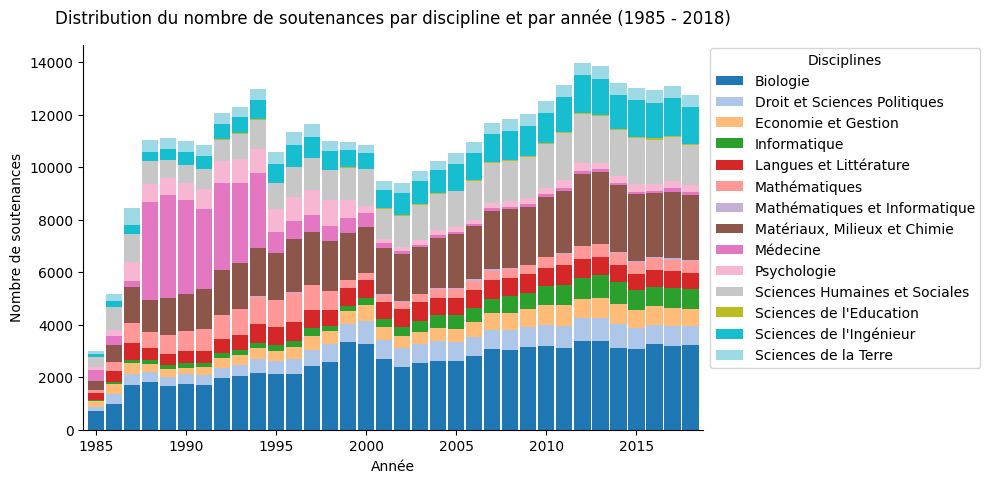

In [19]:
# Création de la figure :
fig, ax = plt.subplots(figsize = (8, 5))

# Création du graphique :
discipline_85_18_groupé.plot(kind = 'bar',
                stacked = True, 
                colormap = 'tab20', 
                width = 0.9, 
                ax = ax)

# Ajout du titre :
ax.set_title('Distribution du nombre de soutenances par discipline et par année (1985 - 2018)', 
             fontsize = 12, 
             pad = 15)

# Ajout des étiquettes :
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de soutenances')

# Ajustement des graduations :
ticks = discipline_85_18_groupé.index[::5]
ax.set_xticks(range(0, len(discipline_85_18_groupé.index), 5))
ax.set_xticklabels(ticks, rotation = 0)

# Affichage de la légende :
ax.legend(title = 'Disciplines', 
          bbox_to_anchor = (1, 1.01), 
          loc = 'upper left')

# Masque des bordures :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage
plt.show()

### II. EXERCICE 2

#### 1. Affichage de la grille de fond

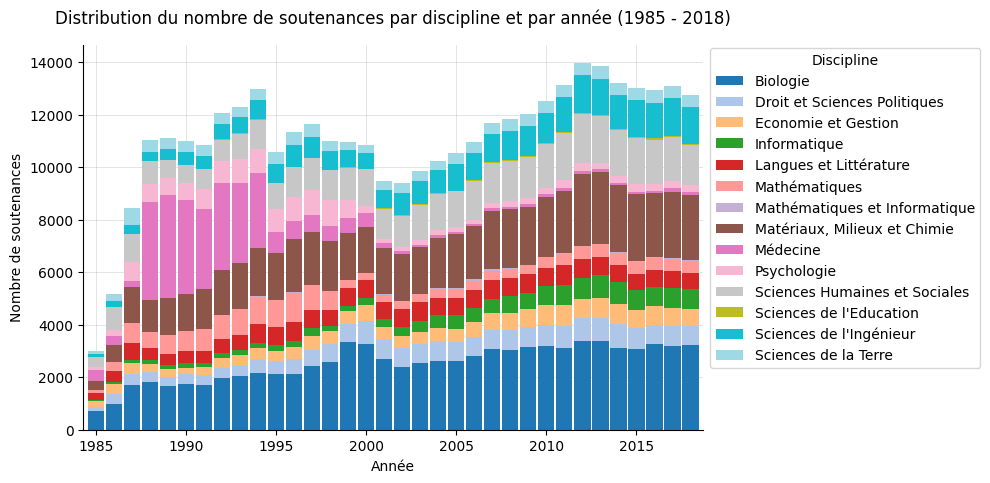

In [20]:
# Création de la figure :
fig, ax = plt.subplots(figsize = (8, 5))

# Création du graphique :
discipline_85_18_groupé.plot(kind = 'bar',
                stacked = True, 
                colormap = 'tab20', 
                width = 0.9, 
                ax = ax)

# Ajout du titre :
ax.set_title('Distribution du nombre de soutenances par discipline et par année (1985 - 2018)', 
             fontsize = 12, 
             pad = 15)

# Ajout des étiquettes :
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de soutenances')

# Ajustement des graduations :
ticks = discipline_85_18_groupé.index[::5]
ax.set_xticks(range(0, len(discipline_85_18_groupé.index), 5))
ax.set_xticklabels(ticks, rotation = 0)

# Ajout d'une grille de fond :
ax.grid(axis = 'both',
        which = 'both',
        linestyle = '-',
        linewidth = 0.5,
        color = 'gray',
        alpha = 0.3)

# Ajustement de l'ordre des éléments :
ax.set_axisbelow(True)

# Affichage de la légende :
ax.legend(title = 'Discipline', 
          bbox_to_anchor = (1, 1.01), 
          loc = 'upper left')

# Masque des bordures :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage de la figure :
plt.show()

#### 2. Modification de la transparence

In [21]:
# Sélection des disciplines spécifiques :
discipline_85_18_groupé_réduit = discipline_85_18_groupé[['Biologie', 'Mathématiques', 'Médecine']]

In [22]:
# Transformation en format long pour seaborn (melt) :
discipline_réduit = discipline_85_18_groupé_réduit.reset_index().melt(id_vars = ['Année'], 
                                                                      var_name = 'Discipline', 
                                                                      value_name = 'Nombre_soutenances')


In [23]:
# Comptabilisation des soutenances par année et discipline :
discipline_réduit = discipline_réduit.groupby(['Année', 'Discipline']).sum().reset_index()

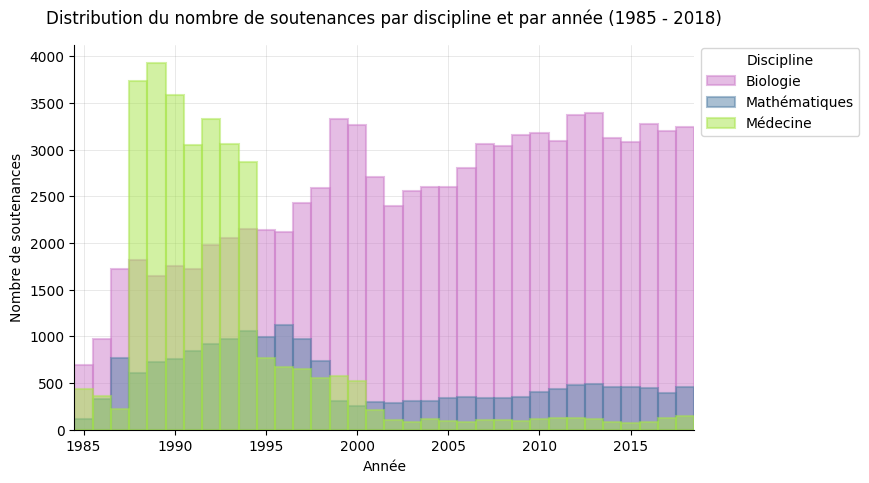

In [24]:
# Création de la figure :
fig, ax = plt.subplots(figsize=(8, 5))

# Création de la liste des couleurs :
palette = ['orchid', 'steelblue', 'greenyellow']

# Création du graphique :
sns.barplot(data = discipline_réduit, 
            x = 'Année', 
            y = 'Nombre_soutenances', 
            hue = 'Discipline', 
            palette = palette, 
            errorbar = None, 
            dodge = False, 
            alpha = 0.5, 
            hue_order = ['Biologie', 'Mathématiques', 'Médecine'],
            width = 1.0, 
            ax = ax)

# Ajout d'une bordure aux barres du graphique :
for bar in ax.patches:
    color = bar.get_facecolor()
    bar.set_edgecolor(color)
    bar.set_linewidth(1.5)

# Affichage de la grille de fond :
ax.grid(axis = 'both', 
        which = 'both', 
        linestyle = '-', 
        linewidth = 0.4, 
        color = 'gray', 
        alpha = 0.3)

# Ajustement de l'ordre des éléments :
ax.set_axisbelow(True)

# Sélection des années à afficher :
annees_range = range(1985, 2019, 5)

# Ajustement des graduations sur l'axe x :
xticks_pos = [i for i, year in enumerate(discipline_réduit['Année'].unique()) if year in annees_range]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(annees_range, 
                   rotation = 0)

# Ajout du titre au graphique :
ax.set_title('Distribution du nombre de soutenances par discipline et par année (1985 - 2018)', 
             fontsize = 12, 
             pad = 15)

# Ajout des étiquettes aux axes :
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de soutenances')

# Affichage de la légende :
ax.legend(title = 'Discipline', 
          bbox_to_anchor = (1, 1.01), 
          loc = 'upper left')

# Masque de la bordure du graphique :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage du graphique :
plt.show()

### III. EXERCICE 3

#### 1. Eloignement des étiquettes de graduations de l'axe des x

In [25]:
# Sélection de la discipline 'Médecine' :
discipline_medecine = discipline_85_18_groupé[['Médecine']]

# Transformation en format long :
discipline_medecine_long = discipline_medecine.reset_index().melt(id_vars = ['Année'], 
                                                                  var_name = 'Discipline', 
                                                                  value_name = 'Nombre_soutenances')

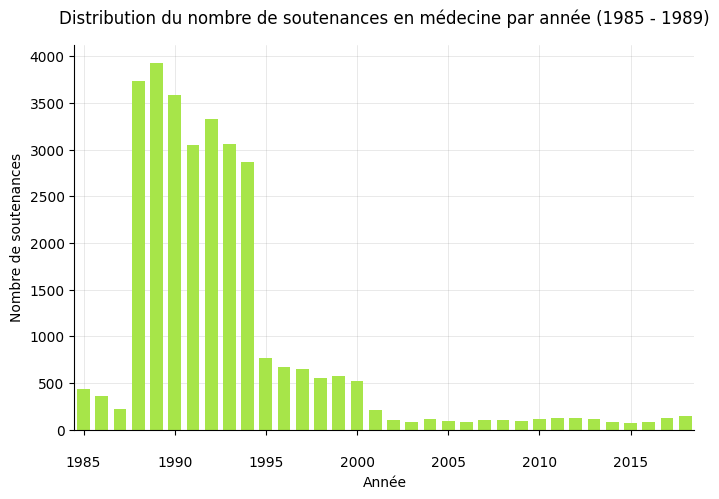

In [26]:
# Création de la figure :
fig, ax = plt.subplots(figsize = (8, 5))

# Création du graphique :
ax = sns.barplot(data = discipline_medecine_long, 
                 x = 'Année', 
                 y = 'Nombre_soutenances', 
                 color = 'greenyellow',
                 errorbar = None, 
                 dodge = False,
                 width = 0.7)

# Affichage de la grille de fond :
ax.grid(axis = 'both', 
        which = 'both', 
        linestyle = '-', 
        linewidth = 0.4, 
        color = 'gray', 
        alpha = 0.3)

# Ajustement de l'ordre des éléments :
ax.set_axisbelow(True)

# Sélection des années à afficher :
annees_range = range(1985, 2019, 5)

# Ajustement des graduations sur l'axe x :
xticks_pos = [i for i, year in enumerate(discipline_réduit['Année'].unique()) if year in annees_range]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(annees_range, 
                   rotation = 0)

# Éloignement des étiquettes de l'axe des x :
ax.tick_params(axis = 'x', 
               pad = 15)

# Ajout du titre au graphique :
plt.title('Distribution du nombre de soutenances en médecine par année (1985 - 1989)', 
          fontsize = 12, 
          pad = 15)

# Ajout des étiquettes des axes :
plt.xlabel('Année')
plt.ylabel('Nombre de soutenances')

# Masque de la bordure du graphique :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage du graphique :
plt.show()

#### 2. Rotation des étiquettes des graduations de l'axe x

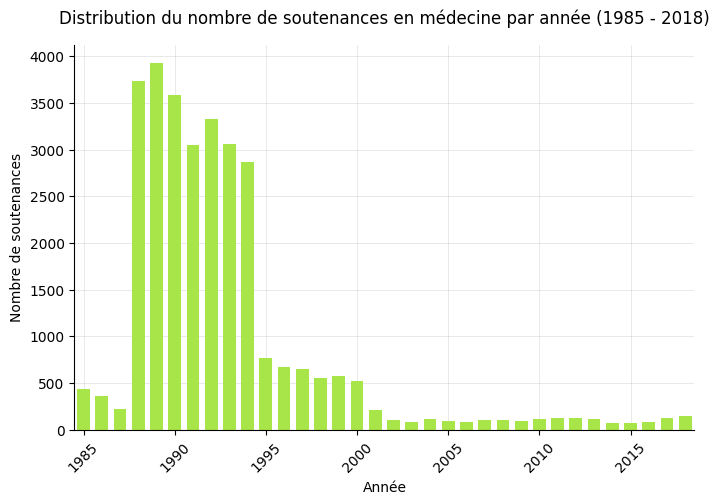

In [27]:
# Création de la figure :
plt.figure(figsize = (8, 5))

# Création du graphique :
ax = sns.barplot(data = discipline_medecine_long, 
                 x = 'Année', 
                 y = 'Nombre_soutenances', 
                 color = 'greenyellow',
                 errorbar = None, 
                 dodge = False,
                 width = 0.7)

# Affichage de la grille de fond :
ax.grid(axis = 'both', 
        which = 'both', 
        linestyle = '-', 
        linewidth = 0.4, 
        color = 'gray', 
        alpha = 0.3)

# Ajustement de l'ordre des éléments :
ax.set_axisbelow(True)

# Ajout du titre au graphique :
plt.title('Distribution du nombre de soutenances en médecine par année (1985 - 2018)', 
          fontsize = 12, 
          pad = 15)

# Ajout des étiquettes aux axes :
plt.xlabel('Année')
plt.ylabel('Nombre de soutenances')

# Sélection des années à afficher :
annees_range = range(1985, 2019, 5)

# Ajustement des graduations sur l'axe des x :
xticks_pos = [i for i, year in enumerate(discipline_réduit['Année'].unique()) if year in annees_range]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(annees_range, 
                   rotation = 45)

# Masque de la bordure du graphique :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage du graphique :
plt.show()

### IV. EXERCICE 4

#### 1. Changement de la police de caractère

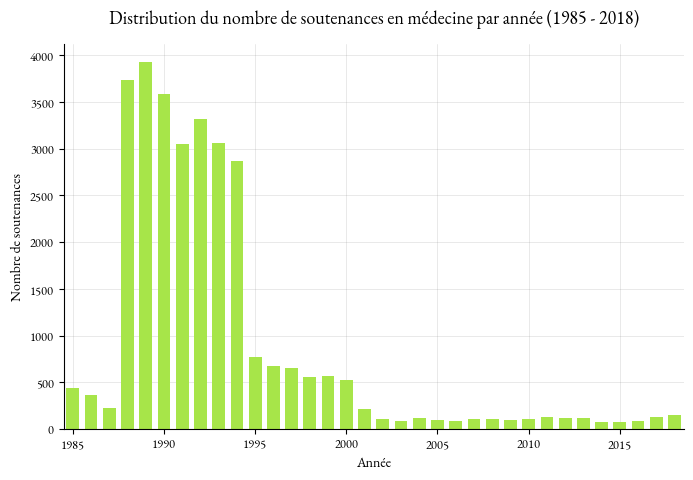

In [28]:
# Changement de la police de caractère et de sa taille :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création de la figure :
plt.figure(figsize = (8, 5))

# Création du graphique :
ax = sns.barplot(data = discipline_medecine_long, 
                 x = 'Année', 
                 y = 'Nombre_soutenances', 
                 color = 'greenyellow',
                 errorbar = None, 
                 dodge = False,
                 width = 0.7)

# Affichage de la grille de fond :
ax.grid(axis = 'both', 
        which = 'both', 
        linestyle = '-', 
        linewidth = 0.4, 
        color = 'gray', 
        alpha = 0.3)

# Ajustement de l'ordre des éléments :
ax.set_axisbelow(True)

# Changement de la taille de la police du titre du graphique :
plt.title('Distribution du nombre de soutenances en médecine par année (1985 - 2018)', 
          fontsize = 13,
          fontname = 'EB Garamond',
          pad = 15)

# Changement de la taille de la police des étiquettes de l'axe y :
plt.xlabel('Année', 
           fontsize = 10, 
           fontname = 'EB Garamond')

# Changement de la taille de la police des étiquettes de l'axe x :
plt.ylabel('Nombre de soutenances', 
           fontsize = 10, 
           fontname = 'EB Garamond')

# Sélection des années à afficher :
annees_range = range(1985, 2019, 5)

# Ajustement des graduations sur l'axe x :
xticks_pos = [i for i, year in enumerate(discipline_réduit['Année'].unique()) if year in annees_range]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(annees_range, 
                   fontsize = 9, 
                   fontname = 'EB Garamond')

# Ajustement des graduations sur l'axe y :
ax.tick_params(axis = 'y', 
               labelsize = 9)

# Masque de la bordure du graphique :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage du graphique :
plt.show()

#### 2. Réduction de la taille des marges

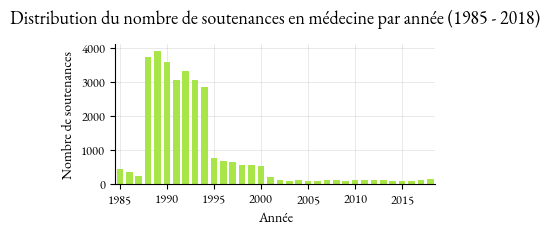

In [29]:
# Changement de la police de caractère et de sa taille :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création de la figure :
plt.figure(figsize = (4, 2))

# Création du graphique :
ax = sns.barplot(data = discipline_medecine_long, 
                 x = 'Année', 
                 y = 'Nombre_soutenances', 
                 color = 'greenyellow',
                 errorbar = None, 
                 dodge = False,
                 width = 0.7)

# Affichage de la grille de fond :
ax.grid(axis = 'both', 
        which = 'both', 
        linestyle = '-', 
        linewidth = 0.4, 
        color = 'gray', 
        alpha = 0.3)

# Ajustement de l'ordre des éléments :
ax.set_axisbelow(True)

# Changement de la taille de la police du titre du graphique :
plt.title('Distribution du nombre de soutenances en médecine par année (1985 - 2018)', 
          fontsize = 13,
          fontname = 'EB Garamond',
          pad = 15)

# Changement de la taille de la police des étiquettes de l'axe x :
plt.xlabel('Année', 
           fontsize = 10, 
           fontname = 'EB Garamond')

# Changement de la taille de la police des étiquettes de l'axe y :
plt.ylabel('Nombre de soutenances', 
           fontsize = 10, 
           fontname = 'EB Garamond')

# Sélection des années à afficher :
annees_range = range(1985, 2019, 5)

# Ajustement des graduations de l'axe x :
xticks_pos = [i for i, year in enumerate(discipline_réduit['Année'].unique()) if year in annees_range]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(annees_range, 
                   fontsize = 9, 
                   fontname = 'EB Garamond')

# Ajustement des graduations de l'axe y :
ax.tick_params(axis = 'y', 
               labelsize = 9)

# Masque des bordures :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustement des marges :
plt.subplots_adjust(left = 0.1, 
                    right = 0.9, 
                    top = 0.9, 
                    bottom = 0.2)

# Affichage du graphique :
plt.show()

### V. EXERCICE 5

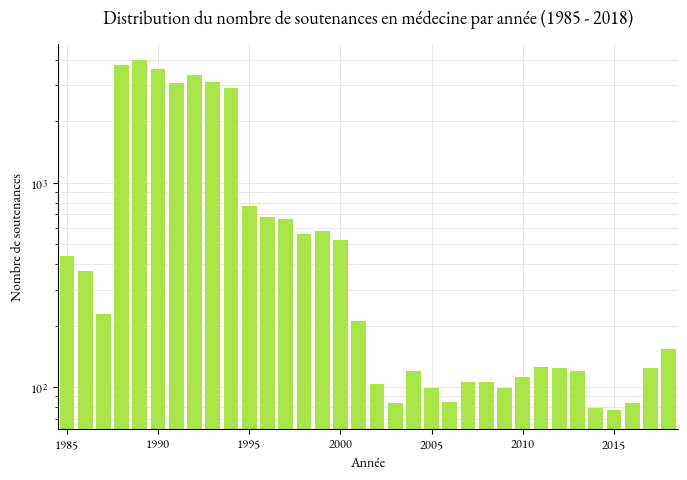

In [30]:
# Changement de la police de caractère et de sa taille :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création de la figure :
plt.figure(figsize = (8, 5))

# Création du graphique :
ax = sns.barplot(data = discipline_medecine_long, 
                 x = 'Année', 
                 y = 'Nombre_soutenances', 
                 color = 'greenyellow',
                 errorbar = None, 
                 dodge = False,
                 width = 0.7)

# Ajout d'une bordure aux barres du graphique :
for bar in ax.patches:
    color = bar.get_facecolor()
    bar.set_edgecolor(color)
    bar.set_linewidth(1.5)

# Affichage de la grille de fond :
ax.grid(axis = 'both', 
        which = 'both', 
        linestyle = '-', 
        linewidth = 0.4, 
        color = 'gray', 
        alpha = 0.3)

# Ajustement de l'ordre des éléments :
ax.set_axisbelow(True)

# Changement de la taille de la police du titre du graphique :
plt.title('Distribution du nombre de soutenances en médecine par année (1985 - 2018)', 
          fontsize = 13,
          fontname = 'EB Garamond',
          pad = 15)

# Personnalisation de l'étiquette de l'axe x :
plt.xlabel('Année', 
           fontsize = 10, 
           fontname = 'EB Garamond')

# Personnalisation de l'étiqutte de l'axe y :
plt.ylabel('Nombre de soutenances', 
           fontsize = 10, 
           fontname = 'EB Garamond')

# Sélection des années à afficher :
annees_range = range(1985, 2019, 5)

# Ajustement des graduations de l'axe x :
xticks_pos = [i for i, year in enumerate(discipline_réduit['Année'].unique()) if year in annees_range]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(annees_range, 
                   fontsize = 9, 
                   fontname = 'EB Garamond')

# Ajustement des graduations de l'axe y :
ax.tick_params(axis = 'y', 
               labelsize = 9)

# Application de l'échelle logarithmique sur l'axe y :
ax.set_yscale('log')

# Masque de la bordure du graphique :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage du graphique :
plt.show()

### VI. EXERCICE 6

#### 1. Ajout de la légende en haut à droite en dehors du graphique

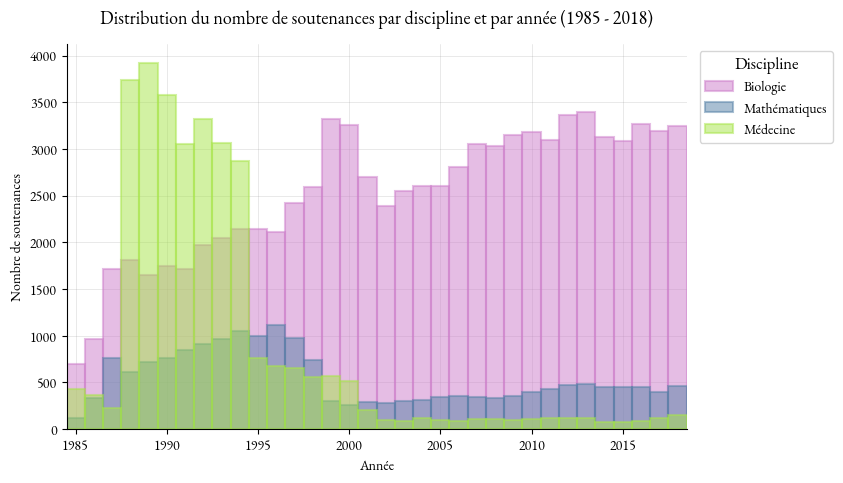

In [31]:
# Changement de la police de caractère et de sa taille :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création de la figure :
fig, ax = plt.subplots(figsize = (8, 5))

# Création de la liste des couleurs :
palette = ['orchid', 
           'steelblue', 
           'greenyellow']

# Création du graphique :
sns.barplot(data = discipline_réduit, 
            x = 'Année', 
            y = 'Nombre_soutenances', 
            hue = 'Discipline', 
            palette = palette, 
            errorbar = None, 
            dodge = False, 
            alpha = 0.5, 
            hue_order = ['Biologie', 
                         'Mathématiques', 
                         'Médecine'],
            width = 1.0, 
            ax = ax)

# Ajout d'une bordure aux barres du graphique :
for bar in ax.patches:
    color = bar.get_facecolor()
    bar.set_edgecolor(color)
    bar.set_linewidth(1.5)

# Affichage de la grille de fond :
ax.grid(axis = 'both', 
        which = 'both', 
        linestyle = '-', 
        linewidth = 0.4, 
        color = 'gray', 
        alpha = 0.3)

# Ajustement de l'ordre des éléments :
ax.set_axisbelow(True)

# Sélection des années à afficher :
annees_range = range(1985, 2019, 5)

# Ajustement des graduations sur l'axe x :
xticks_pos = [i for i, 
              year in enumerate(discipline_réduit['Année'].unique()) if year in annees_range]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(annees_range, 
                   rotation = 0)

# Ajout du titre au graphique :
ax.set_title('Distribution du nombre de soutenances par discipline et par année (1985 - 2018)', 
             fontsize = 13, 
             pad = 15)

# Ajout des étiquettes aux axes :
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de soutenances')

# Affichage de la légende :
ax.legend(title = 'Discipline',
          bbox_to_anchor = (1.01, 1),
          loc = 'upper left',
          fontsize = 10,
          title_fontsize = 12)

# Masque de la bordure du graphique :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage du graphique :
plt.show()

#### 2. Ajout de la légende en haut à droite sur le graphique

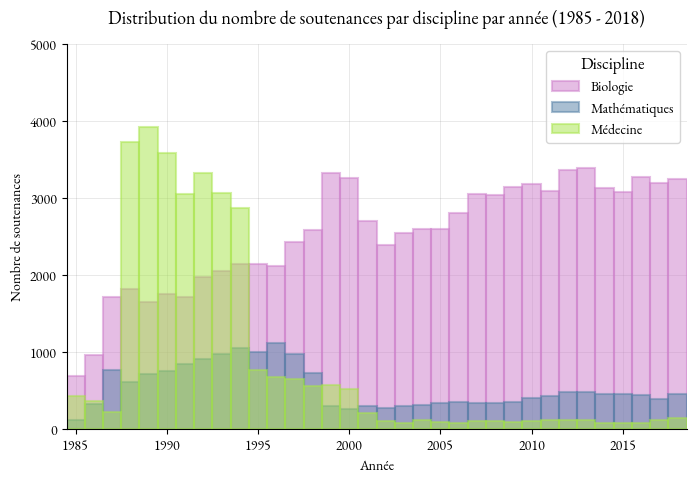

In [32]:
# Création de la figure :
fig, ax = plt.subplots(figsize = (8, 5))

# Liste des couleurs :
palette = ['orchid', 
           'steelblue', 
           'greenyellow']

# Création du graphique :
sns.barplot(data = discipline_réduit, 
            x = 'Année', 
            y = 'Nombre_soutenances', 
            hue = 'Discipline', 
            palette = palette, 
            errorbar = None,
            dodge = False,
            alpha = 0.5,                       
            hue_order = ['Biologie', 
                         'Mathématiques', 
                         'Médecine'],
            width = 1.0,
            ax = ax)

# Ajout d'une bordure aux barres du graphique :
for bar in ax.patches:
    bar.set_edgecolor(bar.get_facecolor())
    bar.set_linewidth(1.5)

# Configuration de la grille de fond :
ax.grid(axis = 'both', 
        which = 'both', 
        linestyle = '-', 
        linewidth = 0.4, 
        color = 'gray', 
        alpha = 0.3)

# Ajustement de l'ordre des éléments :
ax.set_axisbelow(True)

# Sélection des années à afficher :
annees_range = range(1985, 2019, 5)  

# Ajustement des graduations sur l'axe x :
xticks_pos = [i for i, year in enumerate(discipline_réduit['Année'].unique()) if year in annees_range]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(annees_range, 
                   rotation = 0)

# Ajout du titre au graphique :
ax.set_title('Distribution du nombre de soutenances par discipline par année (1985 - 2018)', 
             fontsize = 13, 
             pad = 15)

# Ajout des étiquettes aux axes :
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de soutenances')

# Définition de la limite de l'axe y :
ax.set_ylim(0, 5000)

# Masque de la bordure du graphique :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage de la légende :
ax.legend(title = 'Discipline',
          bbox_to_anchor = (1, 1),
          loc = 'upper right',
          fontsize = 10,
          title_fontsize = 12)

# Affichage du graphique :
plt.show()

### VII. EXERCICE 7

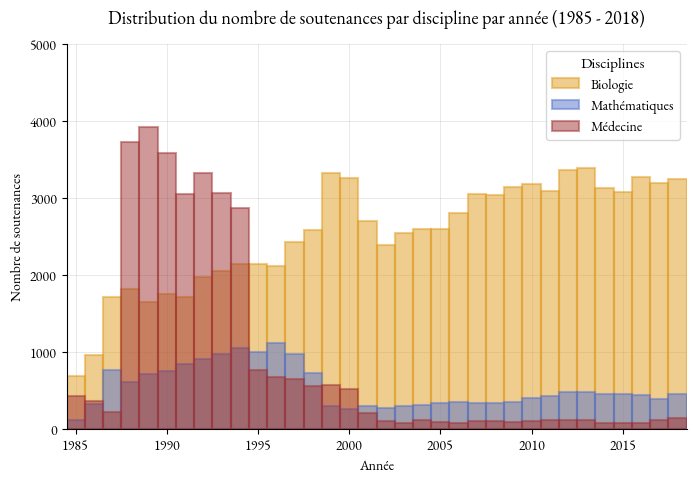

In [33]:
# Création de la figure :
fig, ax = plt.subplots(figsize=(8, 5))

# Liste des couleurs :
palette = ['orange', 'royalblue', 'firebrick']

# Création du graphique :
sns.barplot(data = discipline_réduit, 
            x = 'Année', 
            y = 'Nombre_soutenances', 
            hue = 'Discipline', 
            palette = palette, 
            errorbar = None, 
            dodge = False, 
            alpha = 0.5, 
            hue_order = ['Biologie', 'Mathématiques', 'Médecine'],
            width = 1.0, 
            ax = ax)

# Ajout d'une bordure aux barres du graphique :
for bar in ax.patches:
    color = bar.get_facecolor()
    bar.set_edgecolor(color)
    bar.set_linewidth(1.5)

# Affichage de la grille de fond :
ax.grid(axis = 'both', 
        which = 'both', 
        linestyle = '-', 
        linewidth = 0.4, 
        color = 'gray', 
        alpha = 0.3)

# Ajustement de l'ordre des élémets :
ax.set_axisbelow(True)

# Sélection des années à afficher :
annees_range = range(1985, 2019, 5)

# Ajustement des graduations sur l'axe x :
xticks_pos = [i for i, year in enumerate(discipline_réduit['Année'].unique()) if year in annees_range]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(annees_range, 
                   rotation = 0)

# Ajout du titre au graphique :
ax.set_title('Distribution du nombre de soutenances par discipline par année (1985 - 2018)', 
             fontsize = 13, 
             pad = 15)

# Ajout des étiquettes aux axes :
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de soutenances')

# Définition de la limite de l'axe y :
ax.set_ylim(0, 5000)

# Masque de la bordure du graphique :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage de la légende :
ax.legend(title = 'Disciplines', 
          bbox_to_anchor = (1, 1),
          loc = 'upper right',
          fontsize = 10,
          title_fontsize = 11)

# Affichage du graphique :
plt.show()

### VIII. EXERCICE 8

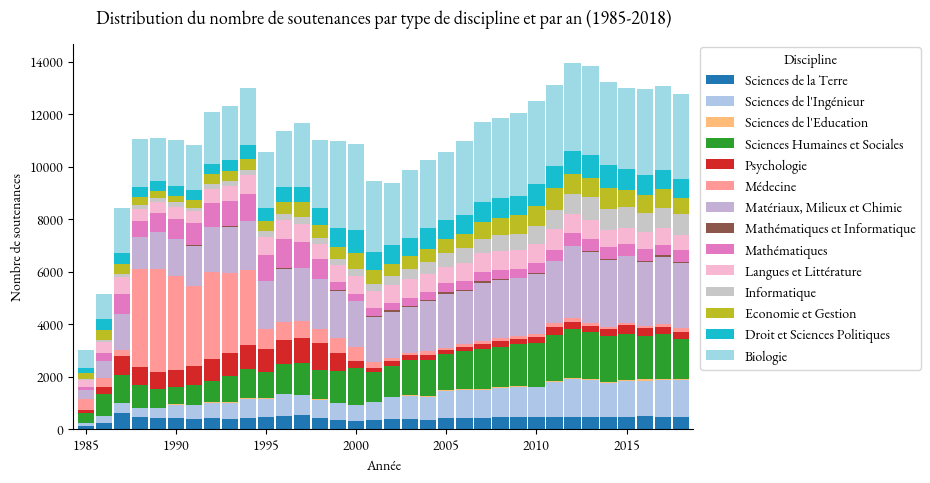

In [34]:
# Inversion de l'ordre des disciplines :
discipline_inverted = discipline_85_18_groupé.iloc[:, ::-1]

# Création de la figure :
fig, ax = plt.subplots(figsize = (8, 5))

# Création du graphique :
discipline_inverted.plot(kind = 'bar',
                         stacked = True,
                         colormap = 'tab20',
                         width = 0.9,
                         ax = ax)

# Ajout du titre :
ax.set_title('Distribution du nombre de soutenances par type de discipline et par an (1985-2018)', 
             fontsize = 13, 
             pad = 15)

# Ajout des étiquettes aux axes :
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de soutenances')

# Sélection et ajustement des graduations :
ticks = discipline_inverted.index[::5]
ax.set_xticks(range(0, len(discipline_inverted.index), 5))
ax.set_xticklabels(ticks, rotation = 0)

# Affichage de la légende :
ax.legend(title = 'Discipline', 
          bbox_to_anchor = (1, 1.01), 
          loc = 'upper left')

# Masque de la bordure du graphique :
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage du graphique :
plt.show()

### IX. EXERCICE 9

#### 1. Création d'une figure avec slider

In [35]:
# Affichage des premières lignes de 'discipline_85_18' :
discipline_85_18.head(3)

,Année,Discipline_prédi
2,1993,Médecine
5,2008,Droit et Sciences Politiques
6,2005,Droit et Sciences Politiques


In [36]:
# Comptabilisation des soutenances par année et par discipline :
discipline_count = discipline_85_18.groupby(['Année', 'Discipline_prédi']).size().reset_index(name = 'Nombre_de_soutenances')
discipline_count.head(3)

,Année,Discipline_prédi,Nombre_de_soutenances
0,1985,Biologie,695
1,1985,Droit et Sciences Politiques,168
2,1985,Economie et Gestion,220


In [37]:
# Ajustement des titres de colonnes :
discipline_count.columns = ['Année', 'Type de discipline', 'Nombre de soutenances']
discipline_count.head(3)

,Année,Type de discipline,Nombre de soutenances
0,1985,Biologie,695
1,1985,Droit et Sciences Politiques,168
2,1985,Economie et Gestion,220


In [38]:
# Calcul de la valeur maximale de la colonne 'Nombre de soutenances' :
valeur_max_1 = discipline_count['Nombre de soutenances'].max()
print(f"La valeur maximale prise par la variable 'Nombre de soutenances' est {valeur_max_1}.")

La valeur maximale prise par la variable 'Nombre de soutenances' est 3926.


In [39]:
# Création de la figure :
fig1 = px.bar(data_frame = discipline_count,
              y = 'Nombre de soutenances',
              x = 'Type de discipline',
              animation_frame = 'Année',
              title = "Distribution du nombre de soutenances par type de discipline et par an (1985-2018)")

# Définition des étapes du slider :
steps = [{'args': [[str(année)], 
                   {'frame': {'duration': 300, 
                              'redraw': True},
                    'mode': 'immediate',
                    'transition': {'duration': 300}}],
          'label': str(année),
          'method': 'animate'}
          for année in discipline_count['Année'].unique()]

# Configuration du slider :
slider = {'currentvalue': {'font': {'size': 12},
                           'visible': True,
                           'xanchor': 'left',
                           'prefix': 'Année : '},
          'steps': steps,
          'pad' : {'t':150}}

# Actualisation de la mise en page :
fig1.update_layout(sliders = [slider],
                   xaxis_title = "Type de discipline",
                   yaxis_title = "Nombre de soutenances",
                   title_x = 0.5,
                   font = dict(family = "EB Garamond",
                               size = 13),
                   height = 700,
                   width = 1000,
                   hoverlabel = dict(font = dict(family = "EB Garamond", 
                                                 size = 12)))

# Actualisation des limites de l'axe y : 
fig1.update_yaxes(range = [0, valeur_max_1 + 50])

# Affichage de la figure :
fig1.show()

#### 2. Création d'une figure avec selector

In [40]:
# Filtre des données pour l'année 2015 :
discipline_count_2015 = discipline_count[discipline_count['Année'] == 2015]

In [41]:
# Affichage des données filtrées :
discipline_count_2015.head(3)

,Année,Type de discipline,Nombre de soutenances
420,2015,Biologie,3086
421,2015,Droit et Sciences Politiques,795
422,2015,Economie et Gestion,677


In [42]:
# Affichage de la valeur maximale de la colonne 'Nombre de soutenances' :
valeur_max_2 = discipline_count_2015['Nombre de soutenances'].max()
print(f"La valeur maximale prise par la variable 'Nombre de soutenances' est {valeur_max_2}.")

La valeur maximale prise par la variable 'Nombre de soutenances' est 3086.


In [43]:
# Création de la figure :
fig2 = px.bar(data_frame = discipline_count_2015,
              y = 'Nombre de soutenances',
              x = 'Type de discipline')

# Actualisation des limites de l'axe y :
fig2.update_yaxes(range = [0, valeur_max_2 + 50])

# Création des boutons de sélection :
my_buttons = [{'label': "Barplot",
               'method': "update",
               'args': [{"type": "bar"}]},
              {'label': "Scatterplot",
               'method': "update",
               'args': [{'type': "scatter", 
                         'mode': 'markers'}]}]

# Ajout des boutons à la figure :
fig2.update_layout(updatemenus = [{'type': 'buttons',
                                   'direction': 'down',
                                   'x': 1.01,
                                   'y': 1,
                                   'xanchor': 'left',
                                   'yanchor': 'top',
                                   'showactive': True,
                                   'active': 0,
                                   'buttons': my_buttons}],
                   hoverlabel = dict(font = dict(family = "EB Garamond", 
                                                 size = 13)),
                   font = dict(family = "EB Garamond", 
                               size = 13),
                   title = dict(text = "Distribution du nombre de soutenances par type de discipline (2015)", 
                                font = dict(size = 18)),
                   title_x = 0.5,
                   height = 500,
                   width = 800)

# Affichage de la figure :
fig2.show()

#### 3. Enregistrement des widgets au format html

In [44]:
# Exporter la figure au format HTML
pio.write_html(fig1,
               file = "graphique_slider.html",
               auto_open = True)

In [45]:
# Exporter la figure au format HTML
pio.write_html(fig2,
               file = "graphique_selector.html",
               auto_open = True)